Saving sales-of-shampoo-over-a-three-ye (1).csv to sales-of-shampoo-over-a-three-ye (1).csv


<ipython-input-1-3676eb30edfe>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2001-01-01', periods=len(df), freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-1-3676eb30edfe>:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))


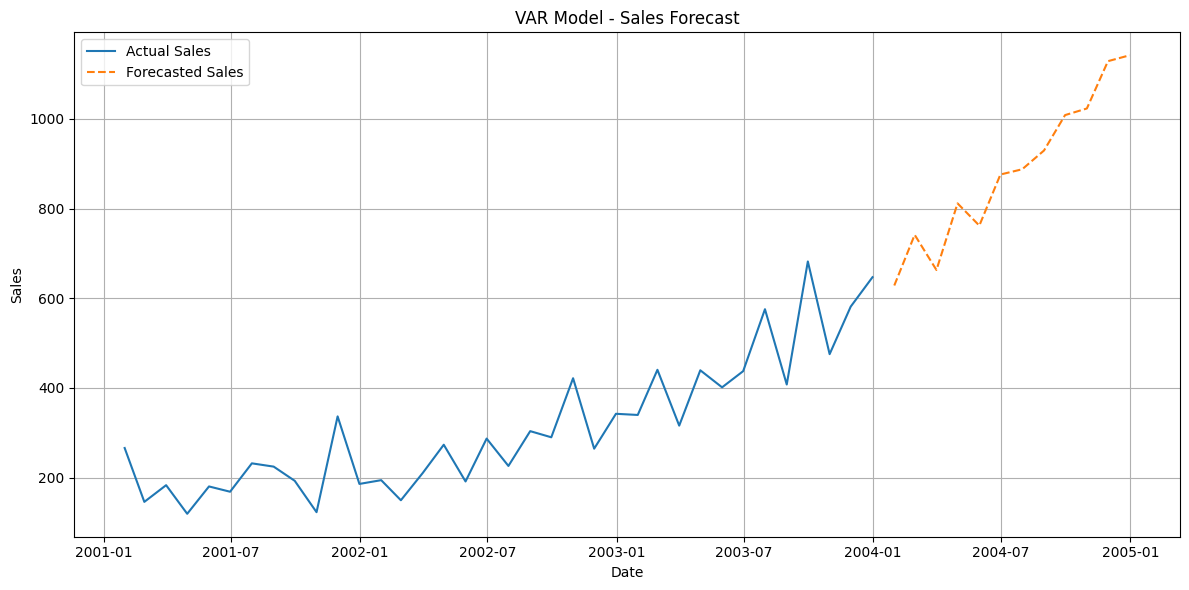

In [1]:
# Step 1: Install required library
!pip install statsmodels

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from google.colab import files

# Step 3: Upload your dataset
uploaded = files.upload()

# Step 4: Load and clean the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.columns = ['Month', 'Sales']
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df = df.dropna()
df['Month'] = pd.date_range(start='2001-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

# Step 5: Simulate a second variable (e.g., advertising budget)
np.random.seed(42)
df['Advertising'] = df['Sales'] * 0.5 + np.random.normal(0, 10, size=len(df))

# Step 6: Fit VAR model
model_data = df[['Sales', 'Advertising']]
model = VAR(model_data)
results = model.fit(maxlags=5, ic='aic')

# Step 7: Forecast next 12 periods
forecast_input = model_data.values[-results.k_ar:]
forecast = results.forecast(y=forecast_input, steps=12)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, columns=['Sales_forecast', 'Advertising_forecast'],
                           index=pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'))

# Step 8: Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Sales'], label='Actual Sales')
plt.plot(forecast_df['Sales_forecast'], label='Forecasted Sales', linestyle='--')
plt.title('VAR Model - Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
